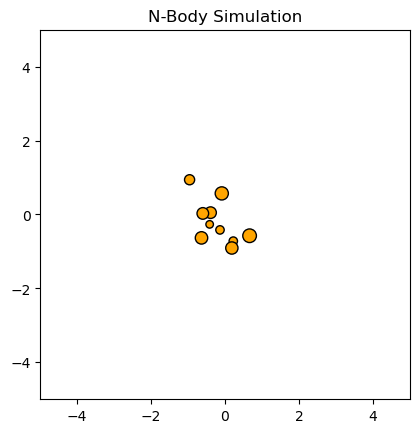

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#parameters
G      = 6.67430e-11 # gravitational constant in m^3 kg^-1 s^-2
#G      = 1.0        #gravitational constant test ex 
DT     = 0.008      #time step #orginal value 0.01
STEPS  = 5000       #number of steps to simulate
N      = 10          #number of bodies

#random initial conditions
np.random.seed(42)
masses    = np.random.uniform(0.5, 2.0, size=(N,))          #random masses
positions = np.random.uniform(-1, 1, size=(N, 2))           #x, y
velocities = np.random.uniform(-0.5, 0.5, size=(N, 2))      #vx, vy

def compute_accelerations(pos, m):
    """
    pos: (N,2) array of positions
    m:   (N,)   array of masses
    returns (N,2) array of accelerations on each body
    """
    N = pos.shape[0]
    acc = np.zeros_like(pos)
    for i in range(N):
        #vector from i → all
        delta = pos - pos[i]                   #(N,2)
        dist_sq = np.sum(delta**2, axis=1)     #(N,)
        
        softening = 1e-3 #softening length to avoid singularities and explosions of bodys
        inv_dist3 = np.where(dist_sq>0, (dist_sq + softening**2)**(-1.5), 0.0) 
        
        #inv_dist3 = np.where(dist_sq>0, dist_sq**(-1.5), 0.0) #old line
        #this above line is the old line that doesnt soften or prevent explosions of n-bodys
        
        # a_i = G * Σ_{j≠i} m_j * (r_j - r_i) / |r_j - r_i|^3
        forces = (G * m[:,None] * delta) * inv_dist3[:,None]
        acc[i] = forces.sum(axis=0)
    return acc

#Anamation 
fig, ax = plt.subplots()
scat = ax.scatter(positions[:,0], positions[:,1],
                  s=masses*50, c='orange', edgecolor='k')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.set_title('N‑Body Gravitational Simulation')

def init():
    scat.set_offsets(positions)
    return (scat,)

def update(frame):
    global positions, velocities
    #velocity‑Verlet step:
    a1 = compute_accelerations(positions, masses)
    positions += velocities * DT + 0.5 * a1 * DT**2
    a2 = compute_accelerations(positions, masses)
    velocities += 0.5 * (a1 + a2) * DT

    scat.set_offsets(positions)
    return (scat,)

ani = FuncAnimation(
    fig, update, frames=STEPS, init_func=init,
    blit=True, interval=20, repeat=False
)

plt.title("N-Body Simulation")
plt.show()